In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from extra_packages.OutputInterface import OutputInterface
import extra_packages.sperhical_expansion as se
import SFALinearPulse as SFA_Lin
from matplotlib.colors import LogNorm
from scipy.special import sph_harm

In [2]:
import multiprocessing
#import ipyparallel as ipp
try:
    cpus = multiprocessing.cpu_count()
except NotImplementedError:
    cpus = 8   # arbitrary default
pool = multiprocessing.Pool(processes=cpus)

In [3]:
omega = 0.057     # Frequency of light
Up = 0.22         # Ponderomotive potential
CEP = np.pi/2

### Let's try to expand the chiral hydrogen state...

In [29]:
def hyd_4d(r, theta, phi, m):
    R_42 = 1/(64*np.sqrt(5)) * (1 - r/12) * r**2 * np.exp(-r/4)
    return R_42 * sph_harm(m, 2, phi, theta)

def hyd_4f(r, theta, phi, m):
    R_43 = 1/(768*np.sqrt(35)) * r**3 * np.exp(-r/4)
    return R_43 * sph_harm(m, 3, phi, theta)

def hyd_rho(r, theta, phi, pm=1):
    return 0.5 * (hyd_4d(r, theta, phi, pm) + 1j*hyd_4f(r, theta, phi, pm) - hyd_4d(r, theta, phi, -pm) + 1j*hyd_4f(r, theta, phi, -pm))

rho_p = lambda r, theta, phi : hyd_rho(r, theta, phi, 1)
rho_m = lambda r, theta, phi : hyd_rho(r, theta, phi, -1)

Ip = 1/(2*4**2)
kappa = np.sqrt(2 * Ip)

In [30]:
n_r = 40
r_lst = np.linspace(1, 10, n_r)
flms = []
for i, r in enumerate(r_lst):
    print(f'Evaluating at r={r:.4f} \t Nr. {i+1}/{n_r}')
    flms.append(se.spherical_expansion(lambda theta, phi: rho_p(r, theta, phi), 50))

Evaluating at r=1.0000 	 Nr. 1/40
Evaluating at r=1.2308 	 Nr. 2/40
Evaluating at r=1.4615 	 Nr. 3/40
Evaluating at r=1.6923 	 Nr. 4/40
Evaluating at r=1.9231 	 Nr. 5/40
Evaluating at r=2.1538 	 Nr. 6/40
Evaluating at r=2.3846 	 Nr. 7/40
Evaluating at r=2.6154 	 Nr. 8/40
Evaluating at r=2.8462 	 Nr. 9/40
Evaluating at r=3.0769 	 Nr. 10/40
Evaluating at r=3.3077 	 Nr. 11/40
Evaluating at r=3.5385 	 Nr. 12/40
Evaluating at r=3.7692 	 Nr. 13/40
Evaluating at r=4.0000 	 Nr. 14/40
Evaluating at r=4.2308 	 Nr. 15/40
Evaluating at r=4.4615 	 Nr. 16/40
Evaluating at r=4.6923 	 Nr. 17/40
Evaluating at r=4.9231 	 Nr. 18/40
Evaluating at r=5.1538 	 Nr. 19/40
Evaluating at r=5.3846 	 Nr. 20/40
Evaluating at r=5.6154 	 Nr. 21/40
Evaluating at r=5.8462 	 Nr. 22/40
Evaluating at r=6.0769 	 Nr. 23/40
Evaluating at r=6.3077 	 Nr. 24/40
Evaluating at r=6.5385 	 Nr. 25/40
Evaluating at r=6.7692 	 Nr. 26/40
Evaluating at r=7.0000 	 Nr. 27/40
Evaluating at r=7.2308 	 Nr. 28/40
Evaluating at r=7.4615 	 Nr. 

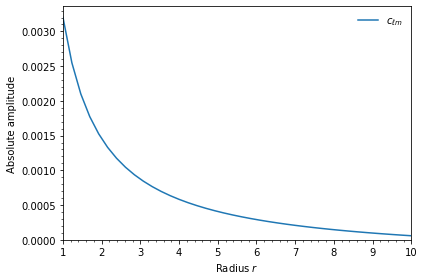

In [36]:
plt.figure(facecolor='white')

def radial(r, kappa):
    return r**(1/kappa - 1) * np.exp(-kappa*r)

sgn, l, m = 1,2,1
#plt.plot(r_lst, np.array([output.eval_orbital_spherical(r, np.pi/2, 0) for r in r_lst])*100, label=r'$\psi_0$')
plt.plot(r_lst, np.abs(np.array(flms)[:, sgn, l, m])/radial(r_lst, kappa), label=r'$c_{\ell m}$')
#plt.plot(r_lst, np.abs(np.array(flms)[:, sgn, l, m]),  label=r'$f_{\ell m}$')
plt.legend(frameon=False)
plt.xlabel(r'Radius $r$')
plt.ylabel(r'Absolute amplitude')
plt.minorticks_on()
plt.xlim(r_lst[0], r_lst[-1])
plt.ylim(bottom=0)
plt.tight_layout()